![](https://i.pinimg.com/originals/0f/57/41/0f5741c61305fa3489653c7650c94658.jpg)
<a name="introduction"></a>

In this project, I am going to start learning how to do web scraping. I am planning to web scrape iMDB and Rotten Tomato to get info about each movie.  My aim is to collect as much data as possible. This will be a continuous project with the implementation of machine learning and NLP. We will start with machine learning section and try to predict the movie score based on all the info we collect from those two websites. Let's get started. 

# Objectives
- [Introduction](#introduction)
- [Import necessary modules](#modules)
- [Imdb_webscraping_part#1](#imdb1)
- [Imdb_webscraping_part#2](#imdb2)
- [Rotten tomato webscraping](#Rotten tomato webscraping)
- [Cleaning All datasets(This is the starting point of this project after collecting all the data)](#cleaning_data_sets)
- [Visualization](#visualization)
- [Feature Engineering](#feature_engineering)
- [Train-test split](#train_test_split)
- [Creating models](#creating_models)
- [Result metrics](#result_metrics)
- [Feature Importance](#feature_importance)
- [ROC/AUC curve](#roc_auc_curve)
- [Wrapping Up](#wrapping_up)
- [Next](#next)

#### Importing all the necessary modules
<a name="#modules"></a>


We are start out by importing a bunch of libraries that will help us with the task.  

In [1]:
## Importing necessary modules
import csv  # # Working with CSV.
import re  # # Regular Expression.
import time  # # Time the code.

import numpy as np  # # Helps to do most of the linear algebra work.
import pandas as pd
import requests  # # requests is used to do web scraping.
from bs4 import BeautifulSoup  # # Library that printed html object nicely.

pd.set_option('display.max_columns', 500) ## to see all the columns,
pd.set_option('display.max_rows', 500) ## To see all the rows. 

#### Imdb webscraping part #1
<a name="imdb1"></a>

In [2]:
%%time
## Creating some empty list that will be used to collect info. 
title_id = []
title = []
runtime =[]
genre = []
certificate = []
imdb_rating = []
gross = []
year = []
votes = []
director_actor=[]
metascore=[]
## Looping through each page of the IMDB website which consists of 50
##movies in each page, picking movies only with more than 1000 votes 
#and a rating higher than 9 and lower than 5


## Whenever we use "nested for loops" it exponentially increase our executing time. 
## I wrote these codes when I started out learning python and it was an amazing time. 
## Hopefully I have come a long way from then, but these codes haven't. However, these codes 
## gets the needed job done, with the expense of resources and time. I am hoping to relapce these codes 
## very soon. Until then. Enjoy!! 


## a is doing 30 iterations to get 1500 movies
for a in range(30): 
    ## b is doing 2 iterations to switch r value
    for b in range(2): 
        
        # r with rating above 8
        r = requests.get("http://www.imdb.com/search/title?num_votes=1000,&title_type=feature,tv_movie,documentary,\
                          short&user_rating=8.0,&page="+str(a)+"&ref_=adv_nxt")
       
        ## altering the value of r, in order to scrape movies with rating lower than 5.
        if b == 1:
         
            # r with rating below 5
            r = requests.get("http://www.imdb.com/search/title?num_votes=1000,&title_type=feature,tv_movie,documentary,\
                              short&user_rating=,5.0&page="+str(a)+"&ref_=adv_nxt")
       
        ## use BeautifulSoup based on either r
        soup = BeautifulSoup(r.content, "lxml")
        
        for i in soup.findAll(class_='lister-item-content'):
            
            # Getting title_id
            title_id.append(re.findall(r'tt.+\d', str(i.find("a"))))
            
            # Getting title
            title.append(i.find('a').text.strip())
            
            # Gerring genre
            try:
                genre.append(i.find('span', class_ = "genre").text.strip())
            except:
                genre.append(None)
            
            # Getting runtime
            try:
                # runtime.append(re.findall(r'\d+', i.find('span', class_ = "runtime").text)[0])
                runtime.append(re.findall(r'\d+', i.find('span', class_ = "runtime").text))
            except:
                runtime.append(None)
            
            # Getting certificate    
            try:
                certificate.append(i.find("span", class_ ="certificate").text)
            except:
                certificate.append(None)
            
            # Getting imdb_rating
            imdb_rating.append(float(i.find("strong").text))
            
            # Getting year
            year.append(i.find("span", class_="lister-item-year text-muted unbold").text)
            
            # Getting votes
            votes.append((i.find("span", attrs={"name":"nv"}).text).replace(",",""))
            
            # Getting gross
            try:
                #gross.append(i.find("span", attrs={"name":"nv"}).find_next_sibling("span", attrs={"name":"nv"}).get_text())
                gross.append(re.findall(r'\d.+\d', i.find("span", attrs={"name":"nv"}).find_next_sibling("span", \
                attrs={"name":"nv"}).get_text()))
            except:
                gross.append(None)
            
            ## Getting director and actors
            try:
                director_actor.append(i.find("p", class_="text-muted").find_next_sibling("p", class_="").text.strip())
            except:
                director.append(None)
            
            ## Getting metascore
            try:
                metascore.append(int(i.find("span",  class_="metascore favorable").text.strip()))
            except:
                metascore.append(None)

CPU times: user 14.6 s, sys: 154 ms, total: 14.7 s
Wall time: 1min 7s


In [3]:
%%time
## checking the length of each features
print (len(title_id))
print (len(title))
print (len(runtime))
print (len(genre))
print (len(certificate))
print (len(imdb_rating))
print (len(gross))  ## there seems to be a problem with the gross, will look into that. 
print (len(year))
print (len(votes))
print (len(director_actor))
print (len(metascore))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
CPU times: user 196 µs, sys: 105 µs, total: 301 µs
Wall time: 213 µs


In [5]:
## Fix title_id since its picking up some extra characters we do not want. 
a = []
for i in title_id:
    for j in i:
        a.append(j.split("/")[0])
title_id = a

In [6]:
data_list = [title_id, title, runtime, genre, certificate, imdb_rating, gross, year, votes, director_actor, metascore]

In [7]:
df = pd.DataFrame(data_list)

In [171]:
df = df.T

In [9]:
header =["title_id", "title", "runtime", "genre", "certificate", "imdb_rating", "gross", "year", "votes", "director_actor", "metascore"] 

In [10]:
df.columns = header

In [11]:
df.head()

,title_id,title,runtime,genre,certificate,imdb_rating,gross,year,votes,director_actor,metascore
0,tt1727824,Bohemian Rhapsody,[134],"Biography, Drama, Music",PG-13,8.2,[206.74],(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,None
1,tt6155172,Roma,[135],Drama,R,8,None,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96
2,tt1517451,A Star Is Born,[136],"Drama, Music, Romance",R,8,[206.91],(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88
3,tt6966692,Green Book,[130],"Biography, Comedy, Drama",PG-13,8.3,[51.50],(2018),41587,Director:\nPeter Farrelly\n| \n Stars:\nVig...,70
4,tt4633694,Spider-Man: Into the Spider-Verse,[117],"Animation, Action, Adventure",PG,8.7,[170.88],(2018),89749,"Directors:\nBob Persichetti, \nPeter Ramsey, \...",87


In [12]:
## The code above ran in AWS and once the web scrapig was completed, the data was stored as a csv file in EC2. 
df.to_csv('imdb_1.csv', encoding="utf-8")

<a name="imdb2"></a>
#### Imdb webscarping part #2

In [13]:
%%time

import sys
sys.stdout = open('/dev/stdout', 'w') ## this is just for me to print out "w" in the termin and make sure that My code is working

user_review =[]
critic_review = []
writer = []
language = []
country = []
budget = []
gross_1 = []
opening_week=[]
oscar_win = []
oscar_nom = []
other_win = []
other_nom = []
count = 0
for i in title_id:
    
    sys.stdout.write(i + '\n')## this is just for me to print out "w" in the termin and make sure that My code is working
    
    r = requests.get("http://www.imdb.com/title/"+str(i)+"/?ref_=nv_sr_1")
    soup = BeautifulSoup(r.content, "lxml")
    
    # Getting User_review_no
    try:
        user_review.append(re.findall(r'.+\d', soup.find('span', attrs={'itemprop':"reviewCount"}).text))
    except:
        user_review.append(None)
    # Getting Critic_no
    try:
        critic_review.append(re.findall(r'.+\d',soup.find('span', attrs={'itemprop':"reviewCount"}).find_next_sibling().text))
    except:
        critic_review.append(None)
        
    """try:
        won.append(soup.find("span", itemprop="awards").text.strip())
    except:
        won.append(None)"""
    # Getting Writer
    try:
        writer.append(soup.find('span', attrs={'itemprop':"creator"}).text)
    except:
        writer.append(None)
    """for i in soup.find_all('h4',class_ = "inline"):
        if i.text.strip() == "Writers:" or i.text.strip() =="Writer":
            writer.append(i.find_next().text.strip())"""
    
    # Getting Language
    a = 0
    try:
        for i in soup.find_all("h4", class_ = 'inline'):
            if i.text.strip() == "Language:":
                a = i.find_next().text
                #language.append(i.find_next().text)
    except:
        a = None
    language.append(a)
        
    # Getting Country
    a = 0
    try:
        for i in soup.find_all('h4',class_ = "inline"):
            if i.text.strip() == "Country:":
                a = i.find_next().text.strip()
                #country.append(i.find_next().text.strip())
    except:
        a = None
    country.append(a)
            
    # Getting Budget
    a = 0
    try:
        for i in soup.find_all("h4", class_ = "inline"):
            if i.text.strip() == "Budget:":
                a = (i.next_sibling.strip()).replace(",","")
               # budget.append((i.next_sibling.strip()).replace(",",""))
    except:
        a = None
    budget.append(a)
            
    # Getting Gross
    a = 0
    try:
        for i in soup.find_all("h4", class_ = "inline"):
            if i.text.strip() == "Gross:":    
                a = (i.next_sibling.strip()).replace(",","")
                #gross_1.append((i.next_sibling.strip()).replace(",",""))
    except:
        a = None
    gross_1.append(a)
        
    # Getting Opening Weekend
    a = 0
    try:
        for i in soup.find_all("h4", class_ = "inline"):
            if i.text.strip() == "Opening Weekend:":
                a = (i.next_sibling.strip()).replace(",","")
                #opening_week.append((i.next_sibling.strip()).replace(",",""))
    except:
        a = None
    opening_week.append(a)
    
    
    # Getting Oscar, Oscar_nomination, Other_awards, Other_nomminations
    # getting oscar
    while soup.find_all("span", attrs={"itemprop":"awards"}):
        for i in soup.find_all("span", attrs={"itemprop":"awards"}):
            if "Won" in i.text and ("Oscar." in i.text or "Oscars." in i.text):
                oscar_win.append(re.findall(r'\d+', i.text.strip("")))
                break
            else:
                oscar_win.append(None)
                break
        break
    else:
        oscar_win.append(None)
        
    # find nominations for oscar
    while soup.find_all("span", attrs={"itemprop":"awards"}):
        for i in soup.find_all("span", attrs={"itemprop":"awards"}):
            if "Nominated" in i.text and ("Oscar." in i.text or "Oscars." in i.text):
                oscar_nom.append(re.findall(r'\d+', i.text.strip("")))
                break
            else:
                oscar_nom.append(None)
                break
        break
    else:
        oscar_nom.append(None)
    
    # Getting other wins
    try:
        for i in soup.find_all("span", attrs={"itemprop":"awards"}):
            #print i.text
            if ("wins" in i.text or "win" in i.text) and ("nominations" in i.text or "nomination." in i.text):
                a = re.findall(r'\d+', i.text.strip(""))[0]
            elif ("wins" in i.text or "win" in i.text) and ("nominations" not in i.text or "nomination." not in i.text):
                a = re.findall(r'\d+', i.text.strip(""))[0]
            elif ("wins" not in i.text or "win" not in i.text) and ("nominations" in i.text or "nomination." in i.text):
                a = None
    except:
        a = None
    other_win.append(a)
        
        
    # Getting other nominations
    try:
        for i in soup.find_all("span", attrs={"itemprop":"awards"}):
            #print i.text
            if ("wins" in i.text or "win" in i.text) and ("nominations" in i.text or "nomination." in i.text):
                #other_nom.append(re.findall(r'\d+', i.text.strip(""))[1])
                a = re.findall(r'\d+', i.text.strip(""))[1]
            elif ("wins" in i.text or "win" in i.text) and ("nominations" not in i.text or "nomination." not in i.text):
                a = None
            elif ("wins" not in i.text or "win" not in i.text) and ("nominations" in i.text or "nomination." in i.text):
                a = re.findall(r'\d+', i.text.strip(""))[0]
    except:
        a = None
    other_nom.append(a)
    count += 1
    


In [14]:
# checking the length of each features

print (len(user_review))
print (len(critic_review))
print (len(writer))
print (len(language))
print (len(country))
print (len(budget))
print (len(gross_1))
print (len(opening_week))
print (len(oscar_win))
print (len(oscar_nom))
print (len(other_win))
print (len(other_nom))



In [15]:
## creating a second list with all the scraped features
data_list_2 = [user_review, critic_review, writer, language, country, budget, gross_1, opening_week, oscar_win, oscar_nom, other_win, other_nom]

In [16]:

df2 = pd.DataFrame(data_list_2)

In [17]:
df2 = df2.T

In [18]:

header2 = ["user_review", "critic_review", "writer", "language", "country", "budget", "gross_1", "opening_week", "oscar_win", "oscar_nom", "other_win", "other_nom"]

In [19]:
df2.columns = header2

In [20]:
## The code above ran in AWS and once the scrapig was completed, the scraped data stored as a csv file in EC2. 
df2.to_csv('imdb_2.csv', encoding="utf-8")

In [26]:
df2.shape

(3000, 12)

In [27]:
## Getting all the titles in order to run through rotten tomato. 
df2["title"] = title

In [30]:
title = df2["title"]

In [28]:
df2.head()

,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,title
0,"[2,392]",[378],None,English,UK,$52000000,0,0,None,None,0,0,Bohemian Rhapsody
1,[624],[311],None,Spanish,Mexico,0,0,0,None,None,0,0,Roma
2,"[1,893]",[395],None,English,USA,$36000000,0,0,None,None,0,0,A Star Is Born
3,[418],[250],None,English,USA,$23000000,0,0,None,None,0,0,Green Book
4,[892],[323],None,English,USA,$90000000,0,0,None,None,0,0,Spider-Man: Into the Spider-Verse


In [31]:
## making necessary changes in order to fit the rotten tomato urls. 
title = title.apply(lambda x:x.replace(" ", "_"))
title = title.apply(lambda x:x.replace(".", ""))
title = title.apply(lambda x:x.replace(":", ""))
title = title.apply(lambda x:x.replace("-", ""))
title = title.apply(lambda x:x.replace(",", ""))
title = title.apply(lambda x:x.replace("'", ""))
title = title.apply(lambda x:x.replace("__", "_"))

## changes that name of the spoted movies to fit the url. 
title = title.apply(lambda x:x.replace("Logan", "logan_2017"))
title = title.apply(lambda x:x.replace("Lion", "lion_2016"))
title = title.apply(lambda x:x.replace("Bahubali_The_Beginning", "Baahubali_The_Beginning"))
title = title.apply(lambda x:x.replace("Star_Wars_Episode_V__The_Empire_Strikes_Back", "empire_strikes_back"))
title = title.apply(lambda x:x.replace("Kavkazskaya_plennitsa_ili_Novye_priklyucheniya_Shurika", "kavkazskaya_plennitsa_ili_novye_priklyucheniya_shurika_kidnapping_caucassian_style"))
title = title.apply(lambda x:x.replace("Star_Wars_Episode_IV_A_New_Hope", "star_wars"))
title = title.apply(lambda x:x.replace("Tom_Petty_and_the_Heartbreakers_Runnin_Down_a_Dream", "runnin_down_a_dream_tom_petty_and_the_heartbreakers"))
title = title.apply(lambda x:x.replace("The_Incredibly_Strange_Creatures_Who_Stopped_Living_and_Became_MixedUp_Zombies!!?", "the_incredibly_strange_creatures"))

#### Rotten_tomato webscraping
<a name="Rotten tomato webscraping"></a>

In [32]:
%%time

import sys
sys.stdout = open('/dev/stdout', 'w')

rt_score = []
rt_avg_rating = []
rt_audience_score = []
rt_user_rating = []
rt_avg_aud_rating = []
rt_fresh = []
rt_rotten = []

for i in title:
    
    sys.stdout.write(i + '\n')
    
    r = requests.get("https://www.rottentomatoes.com/m/"+str(i))
    soup = BeautifulSoup(r.content, "lxml")
    
    # Getting tomato meter score.
    a = 0
    for i in soup.find_all("h3", class_ ="scoreTitle superPageFontColor"):
        if i.text.strip() == "TOMATOMETER":
            try:
                a = i.find_next("span", class_="meter-value superPageFontColor").text
            except:
                a = None
    rt_score.append(a)
    
    # Getting average_rating from tomatometer 
    a = 0
    for i in soup.find_all("div", attrs= {"id":"all-critics-numbers"}):
        try:
            a = re.findall(r'./.\d', i.text.strip())[0]
        except:
            a = None
    rt_avg_rating.append(a)
    
    # Getting audience score meter score.
    a = 0
    for i in soup.find_all("h3", class_ ="scoreTitle superPageFontColor"):
        if i.text.strip() == "AUDIENCE SCORE":
            try:
                a = i.find_next("span" ,class_ ="superPageFontColor").text
            except:
                a = None
    rt_audience_score.append(a)
    
    # Getting user rating from Rotten Tomato
    a = 0
    for i in soup.find_all("span" ,class_ ="subtle superPageFontColor"):
        if i.text == "User Ratings:":
            try:
                a = i.next_sibling.strip()
            except:
                a = None
    rt_user_rating.append(a)
    
    # Getting Average rating from Rotten Tomato(Audience score)
    a = 0
    for i in soup.find_all("span" ,class_ ="subtle superPageFontColor"):
        if i.text == "Average Rating:":
            try:
                a = i.next_sibling.strip()
            except:
                a = None
    rt_avg_aud_rating.append(a)
    
    # finding fresh for all critic
    a = 0
    for i in soup.find_all("span" ,class_ ="subtle superPageFontColor audience-info"):
        if i.text.strip() == "Fresh:":
            a = int(i.find_next().text)
            break
    rt_fresh.append(a)
    
    # finding rotten for all critic
    a = 0
    for i in soup.find_all("span" ,class_ ="subtle superPageFontColor audience-info"):
        if i.text.strip() == "Rotten:":
            a = int(i.find_next().text)
            break
    rt_rotten.append(a)

In [33]:
## creating a third list with all the scraped features
data_list_3 = [rt_score, rt_avg_rating, rt_audience_score, rt_user_rating, rt_avg_aud_rating, rt_fresh, rt_rotten ]

In [36]:
for i in data_list_3:
    print (len(i))

In [37]:

df3 = pd.DataFrame(data_list_3)

In [38]:
df3 = df3.T

In [39]:

header3 = ["rt_score", "rt_avg_rating", "rt_audience_score", "rt_user_rating", "rt_avg_aud_rating", "rt_fresh", "rt_rotten"]

In [40]:
df3.columns = header3

In [41]:
## The code above ran in AWS and once the scrapig was completed, the scraped data stored as a csv file in EC2. 
df3.to_csv('rt.csv', encoding="utf-8")

In [44]:
## re-ran the code for meta score. 
mt_score = []

for i in title_id:
    sys.stdout.write(i + '\n')
    r = requests.get("http://www.imdb.com/title/"+str(i)+"/?ref_=nv_sr_2")
    soup = BeautifulSoup(r.content, "lxml")
    a = 0
    try:
        a = soup.find("a", attrs={"href":"criticreviews?ref_=tt_ov_rt"}).text.strip()
    except:
        a =  None
    print (a)
    mt_score.append(a)

In [47]:
header = ["metascores"]

In [49]:
df_mt.to_csv("meta.csv", encoding="utf-8")

NameError: name 'df_mt' is not defined

# Cleaning all the datasets
<a name ="cleaning_data_sets"></a>

In [50]:
## This can be the socend part of this project, from here on, I dont have to worry web scraping and all 
## the scraped data was saved in a csv file and imported fresh with the following codes
import pandas as pd
import requests
import numpy as np
import re
import csv
from bs4 import BeautifulSoup
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [51]:
## getting the scraped csv files. 
df1 = pd.read_csv('imdb_1.csv')
df2 = pd.read_csv('imdb_2.csv')
df3 = pd.read_csv('rt.csv')
df4 = pd.read_csv('meta.csv')

In [52]:
#Dropping the first columns of each datasets
df1.drop(df1.columns[0], axis=1, inplace=True)
df2.drop(df2.columns[0], axis=1, inplace=True)
df3.drop(df3.columns[0], axis=1, inplace=True)
df4.drop(df4.columns[0], axis=1, inplace=True)

In [53]:
## Assigning header for df4
header = ["metascores"]
df4.columns = header

In [54]:
df1.head()

,title_id,title,runtime,genre,certificate,imdb_rating,gross,year,votes,director_actor,metascore
0,tt1727824,Bohemian Rhapsody,['134'],"Biography, Drama, Music",PG-13,8.2,['206.74'],(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,NaN
1,tt6155172,Roma,['135'],Drama,R,8.0,NaN,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96.0
2,tt1517451,A Star Is Born,['136'],"Drama, Music, Romance",R,8.0,['206.91'],(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88.0
3,tt6966692,Green Book,['130'],"Biography, Comedy, Drama",PG-13,8.3,['51.50'],(2018),41587,Director:\nPeter Farrelly\n| \n Stars:\nVig...,70.0
4,tt4633694,Spider-Man: Into the Spider-Verse,['117'],"Animation, Action, Adventure",PG,8.7,['170.88'],(2018),89749,"Directors:\nBob Persichetti, \nPeter Ramsey, \...",87.0


In [55]:
df1.columns

Index(['title_id', 'title', 'runtime', 'genre', 'certificate', 'imdb_rating',
       'gross', 'year', 'votes', 'director_actor', 'metascore'],
      dtype='object')

In [56]:
## Adding all the colummns together. 
df = pd.concat([df1, df2, df3, df4], axis = 1)

In [57]:
df.head()

,title_id,title,runtime,genre,certificate,imdb_rating,gross,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores
0,tt1727824,Bohemian Rhapsody,['134'],"Biography, Drama, Music",PG-13,8.2,['206.74'],(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,NaN,"['2,392']",['378'],NaN,English,UK,$52000000,0,0,NaN,NaN,0,0,62%,1/10,89%,"17,860",4.4/5,213,133,67.0
1,tt6155172,Roma,['135'],Drama,R,8.0,NaN,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96.0,['624'],['311'],NaN,Spanish,Mexico,0,0,0,NaN,NaN,0,0,96%,9/10,76%,"3,435",3.9/5,315,14,NaN
2,tt1517451,A Star Is Born,['136'],"Drama, Music, Romance",R,8.0,['206.91'],(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88.0,"['1,893']",['395'],NaN,English,USA,$36000000,0,0,NaN,NaN,0,0,90%,1/10,80%,"15,993",4.1/5,403,45,84.0
3,tt6966692,Green Book,['130'],"Biography, Comedy, Drama",PG-13,8.3,['51.50'],(2018),41587,Director:\nPeter Farrelly\n| \n Stars:\nVig...,70.0,['418'],['250'],NaN,English,USA,$23000000,0,0,NaN,NaN,0,0,81%,4/10,95%,"3,723",4.4/5,215,52,76.0
4,tt4633694,Spider-Man: Into the Spider-Verse,['117'],"Animation, Action, Adventure",PG,8.7,['170.88'],(2018),89749,"Directors:\nBob Persichetti, \nPeter Ramsey, \...",87.0,['892'],['323'],NaN,English,USA,$90000000,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN


In [58]:
df.isnull().sum()

title_id                0
title                   0
runtime                 0
genre                   0
certificate            60
imdb_rating             0
gross                 810
year                    0
votes                   0
director_actor          0
metascore            1620
user_review             0
critic_review          30
writer               3000
language                0
country                 0
budget                  0
gross_1                 0
opening_week            0
oscar_win            3000
oscar_nom            3000
other_win               0
other_nom               0
rt_score              210
rt_avg_rating         210
rt_audience_score       0
rt_user_rating          0
rt_avg_aud_rating      30
rt_fresh                0
rt_rotten               0
metascores           2022
dtype: int64

In [59]:
df = df.replace('N/A',np.nan)

In [60]:
# Dropping duplicates 
df.drop_duplicates(inplace = True)

In [61]:
len(df)

1014

In [62]:
## dropping gross column, since I already have another column for gross with less NaN values
df.drop("gross",inplace = True,axis = 1)

In [63]:
df.info()

In [64]:
df.head()

,title_id,title,runtime,genre,certificate,imdb_rating,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores
0,tt1727824,Bohemian Rhapsody,['134'],"Biography, Drama, Music",PG-13,8.2,(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,NaN,"['2,392']",['378'],NaN,English,UK,$52000000,0,0,NaN,NaN,0,0,62%,1/10,89%,"17,860",4.4/5,213,133,67.0
1,tt6155172,Roma,['135'],Drama,R,8.0,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96.0,['624'],['311'],NaN,Spanish,Mexico,0,0,0,NaN,NaN,0,0,96%,9/10,76%,"3,435",3.9/5,315,14,NaN
2,tt1517451,A Star Is Born,['136'],"Drama, Music, Romance",R,8.0,(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88.0,"['1,893']",['395'],NaN,English,USA,$36000000,0,0,NaN,NaN,0,0,90%,1/10,80%,"15,993",4.1/5,403,45,84.0
3,tt6966692,Green Book,['130'],"Biography, Comedy, Drama",PG-13,8.3,(2018),41587,Director:\nPeter Farrelly\n| \n Stars:\nVig...,70.0,['418'],['250'],NaN,English,USA,$23000000,0,0,NaN,NaN,0,0,81%,4/10,95%,"3,723",4.4/5,215,52,76.0
4,tt4633694,Spider-Man: Into the Spider-Verse,['117'],"Animation, Action, Adventure",PG,8.7,(2018),89749,"Directors:\nBob Persichetti, \nPeter Ramsey, \...",87.0,['892'],['323'],NaN,English,USA,$90000000,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,NaN


##### Cleaning runtime. 
<a name = "cleaning_runtime"></a>

In [65]:
df["runtime"] = df['runtime'].str.extract(r'(\d+)')

In [66]:
#df["runtime"] = df["runtime"].apply(lambda x: None if x is None else int(re.findall(r'\d+',i)[0]))

In [67]:
df[df.runtime.isnull()]

,title_id,title,runtime,genre,certificate,imdb_rating,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores


In [68]:
# fill the 4 missing values with the average. 
df.runtime.fillna(106, inplace=True)

In [69]:
df.runtime.isnull().sum()

0

##### Cleaning Award rows

In [70]:
df.oscar_win = df.oscar_win.str.extract(r'(\d+)')
df.oscar_nom = df.oscar_nom.str.extract(r'(\d+)')
df.oscar_win.fillna(0, inplace=True)
df.oscar_nom.fillna(0, inplace=True)
df.other_win.fillna(0, inplace=True)
df.other_nom.fillna(0, inplace=True)



AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [71]:
other_win = []
for i in df.other_win:
    a = 0
    try:
        a = int(i)
    except:
        a = 0
    other_win.append(a)
    
df.other_win = other_win

In [72]:
other_nom = []
for i in df.other_nom:
    a = 0
    try:
        a = int(i)
    except:
        a = 0
    other_nom.append(a)
    
df.other_nom = other_nom

##### Cleaning Genre and Creating columns for each genre

In [73]:
df.genre.isnull().sum()

0

In [74]:
df[df.genre.isnull()]

,title_id,title,runtime,genre,certificate,imdb_rating,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores


In [75]:
## filled the 3 missing genre rows with "Drama"
df.genre.fillna("Drama", inplace=True)

In [76]:
# Create a unique list for genre.
unique_genre = []
for i in df.genre:
    a = i.split(",")
    for b in a:
        if b.strip() not in unique_genre:
            unique_genre.append(b.strip())

In [77]:
## create a cleaned list of lists where each list is a row from each row of the dataFrame. 
cleaned_genre = []
for i in df.genre:
    a = i.split(",")
    c =[]
    for b in a:
        c.append(b.strip())
    cleaned_genre.append(c)

In [78]:
## Creating new columns in the dataFrame and based on unique genre list, pluging in 1 or 0
for i in unique_genre:
    df[i] = [1 if i in x else 0 for x in cleaned_genre]

In [79]:
df.head(3)

,title_id,title,runtime,genre,certificate,imdb_rating,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,opening_week,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores,Biography,Drama,Music,Romance,Comedy,Animation,Action,Adventure,Fantasy,War,Crime,Sci-Fi,Mystery,Documentary,History,Family,Thriller,Horror,Western
0,tt1727824,Bohemian Rhapsody,134,"Biography, Drama, Music",PG-13,8.2,(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,NaN,"['2,392']",['378'],NaN,English,UK,$52000000,0,0,NaN,NaN,0,0,62%,1/10,89%,"17,860",4.4/5,213,133,67.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt6155172,Roma,135,Drama,R,8.0,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96.0,['624'],['311'],NaN,Spanish,Mexico,0,0,0,NaN,NaN,0,0,96%,9/10,76%,"3,435",3.9/5,315,14,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt1517451,A Star Is Born,136,"Drama, Music, Romance",R,8.0,(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88.0,"['1,893']",['395'],NaN,English,USA,$36000000,0,0,NaN,NaN,0,0,90%,1/10,80%,"15,993",4.1/5,403,45,84.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
# Dropping genre and opening_week columns 
df.drop("genre", axis=1, inplace=True)
df.drop("opening_week",axis=1, inplace=True)



In [81]:
df.head(3)

,title_id,title,runtime,certificate,imdb_rating,year,votes,director_actor,metascore,user_review,critic_review,writer,language,country,budget,gross_1,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores,Biography,Drama,Music,Romance,Comedy,Animation,Action,Adventure,Fantasy,War,Crime,Sci-Fi,Mystery,Documentary,History,Family,Thriller,Horror,Western
0,tt1727824,Bohemian Rhapsody,134,PG-13,8.2,(2018),220348,Director:\nBryan Singer\n| \n Stars:\nRami ...,NaN,"['2,392']",['378'],NaN,English,UK,$52000000,0,NaN,NaN,0,0,62%,1/10,89%,"17,860",4.4/5,213,133,67.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt6155172,Roma,135,R,8.0,(2018),64331,Director:\nAlfonso Cuarón\n| \n Stars:\nYal...,96.0,['624'],['311'],NaN,Spanish,Mexico,0,0,NaN,NaN,0,0,96%,9/10,76%,"3,435",3.9/5,315,14,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt1517451,A Star Is Born,136,R,8.0,(2018),161418,Director:\nBradley Cooper\n| \n Stars:\nLad...,88.0,"['1,893']",['395'],NaN,English,USA,$36000000,0,NaN,NaN,0,0,90%,1/10,80%,"15,993",4.1/5,403,45,84.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Meta Score

In [82]:
df.drop("metascore", axis=1, inplace=True) ## dropped the previous meta score code. 

In [83]:
df.metascores.value_counts(dropna=False).head()

NaN      117
 33.0     20
 27.0     20
 85.0     20
 34.0     19
Name: metascores, dtype: int64

In [84]:
#df.metascores.fillna(np.nanmean(df.metascores), inplace=True)

In [85]:
#df.metascores = df.metascores.apply(lambda x: int(x))

##### Munging Language, Country and year column. 

In [86]:
df.language.replace('0', "English", inplace=True)
df.country.replace('0', "USA", inplace=True)
df.year = df.year.apply(lambda x : int(re.findall(r"\D(\d{4})\D", x)[0]))

##### User_review and critic review

In [87]:
df.user_review.replace(",", "", inplace=True)

In [88]:
df.user_review = df.user_review.apply(lambda x: x.replace(",", ""))

In [89]:
df.user_review = df.user_review.str.extract(r'(\d+)')

In [90]:
df.user_review.isnull().sum()

0

In [91]:
#df.user_review.fillna(0, inplace=True)

In [92]:
df.critic_review = df.critic_review.str.extract(r'(\d+)')

In [93]:
df.critic_review.isnull().sum()

11

In [94]:
#df.critic_review.fillna(0, inplace=True)

##### budget and gross

In [95]:
df.budget = df.budget.str.extract(r'(\d+)')
df.budget = df.budget.apply(lambda x: int(x))
df.budget.replace("0", None, inplace=True)

In [96]:
df.gross_1 = df.gross_1.str.extract(r'(\d+)')
df.gross_1 = df.gross_1.apply(lambda x: int(x))
df.gross_1.replace("0",None, inplace=True)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

##### Rotten Tomato scores

In [97]:
df.rt_score = df.rt_score.str.extract(r'(\d+)')

In [98]:
df.rt_score = [None if type(x) is float else int(x) for x in df.rt_score]

In [99]:
df.rt_avg_rating = [None if type(x) is float else x.split("/")[0] for x in df.rt_avg_rating]


In [100]:
df.rt_avg_rating = [int(x) if x else None for x in df.rt_avg_rating]

In [101]:
df.rt_audience_score = df.rt_audience_score.str.extract(r'(\d+)')

In [102]:
df.rt_avg_aud_rating = [None if type(x) is float else x.split("/")[0] for x in df.rt_avg_aud_rating]

In [103]:
df.rt_user_rating = [i.replace(',',"") for i in df.rt_user_rating]

##### Getting Writers.

In [104]:
writer = []
for x in df.writer:
    try:
        a = x.split("(")[0].strip()
        a = a.strip(",")
        a = a.replace(" ", "_")
    except:
        a = None
    writer.append(a)
df.writer = writer

In [105]:
unique_writer = []
for i in df.writer:
    if i not in unique_writer:
        unique_writer.append(i)
len(unique_writer)

1

In [106]:
## Dropping writer since there are too many unique values. 
df.drop("writer", axis=1, inplace=True)

##### Getting Directors.

In [107]:
## Creating a new column with only Directors name. 
director = []
for x in df.director_actor:
    try:
        if "Director:" in x:
            a = x
    except:
        a = None
    director.append(a)
df["director"] = director

In [108]:
## Getting rid of 
director_1 = []
for i in df.director:
    try:
        a = i.split("|")[0]
        a = a.split(":")[1]
        a = a.strip()
        a = a.replace(" ", "_")
    except:
        a = None
    director_1.append(a)
df["director"] = director_1

In [109]:
df.director.isnull().sum()

0

In [110]:
#df[df.director.isnull()].director = "Don Hertzfeldt" ## was trying to manually import one missing value.
## getting rid of that one missing value
df.director.dropna(inplace=True)

In [111]:
u_director = []
for i in df.director:
    if i not in u_director:
        u_director.append(i)
len(u_director)

71

In [112]:
## Dropping "director" columns since there are too many unique values. 
df.drop("director", axis=1, inplace=True)

##### Getting Actors. 

In [113]:
## Creating a new column with only Directors name. 
actor = []
for x in df.director_actor:
    try:
        if "Stars:" in x:
            a = x
    except:
        a = None
    actor.append(a)
df["actors"] = actor

In [114]:
## Getting rid of 
actor = []
for i in df.actors:
    try:
        a = i.split("|")[1]
        a = a.split(":")[1]
        a = a.strip("\n")
        a = a.strip(",")
        a = a.split(",")
        #a = a.replace(" ", "_")
    except:
        a = None
    actor.append(a)
df["actors"] = actor

In [115]:
df.actors[0]

['Rami Malek', ' \nLucy Boynton', ' \nGwilym Lee', ' \nBen Hardy']

In [116]:
b = []
for i in df.actors:
    try:
        a = []
        for j in i:
            c = j.strip()
            c = c.replace(" ","_")
            a.append(c)
    except:
        a = None
    b.append(a)
df.actors = b
        

In [117]:
df.actors[1]

['Yalitza_Aparicio',
 'Marina_de_Tavira',
 'Diego_Cortina_Autrey',
 'Carlos_Peralta']

In [118]:
# Dropping director_actor columns since its not needed anymore.
df.drop("director_actor", axis=1,inplace=True)

In [119]:
# Create a unique list for directors, writers.

In [120]:
## Dropping the actors for now but will look into it in the future. 
df.drop("actors",axis = 1, inplace=True)

##### Certificate

In [121]:
df.certificate.replace("Not Rated", "Unrated", inplace=True)
df.certificate.replace(np.nan, "Unrated", inplace=True)

In [122]:
df.certificate.value_counts(dropna=False)

R          464
PG-13      269
TV-MA       94
PG          88
TV-14       49
Unrated     33
NC-17       10
G            7
Name: certificate, dtype: int64

## Visualization
<a name="visualization"></a>

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

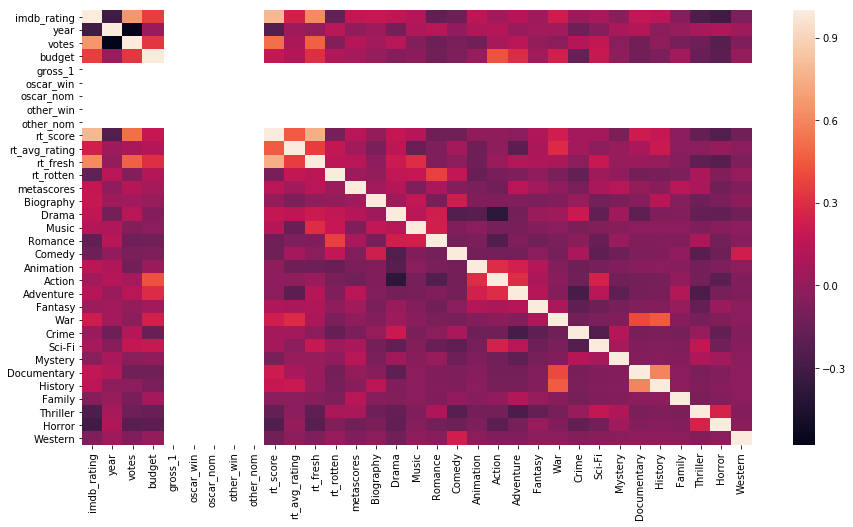

In [124]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr());

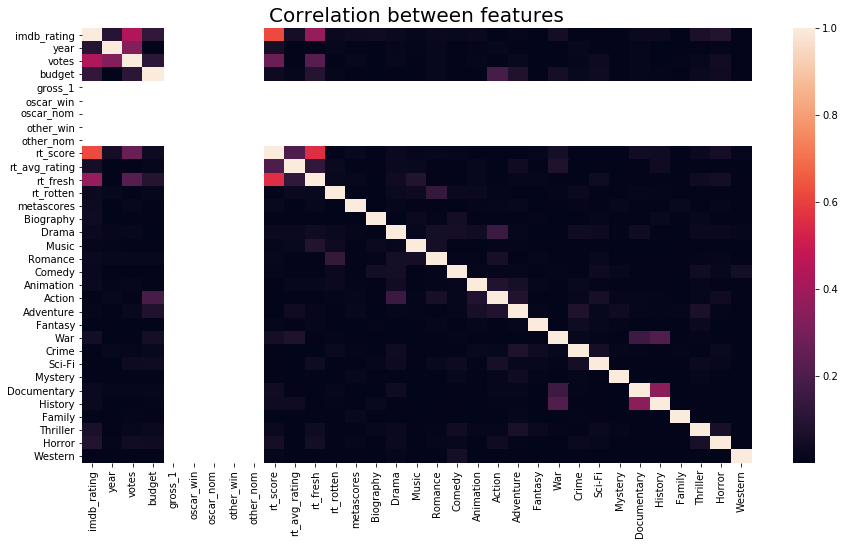

In [125]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(df.corr()**2);
plt.title("Correlation between features", size = 20);

/Users/masumrumi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


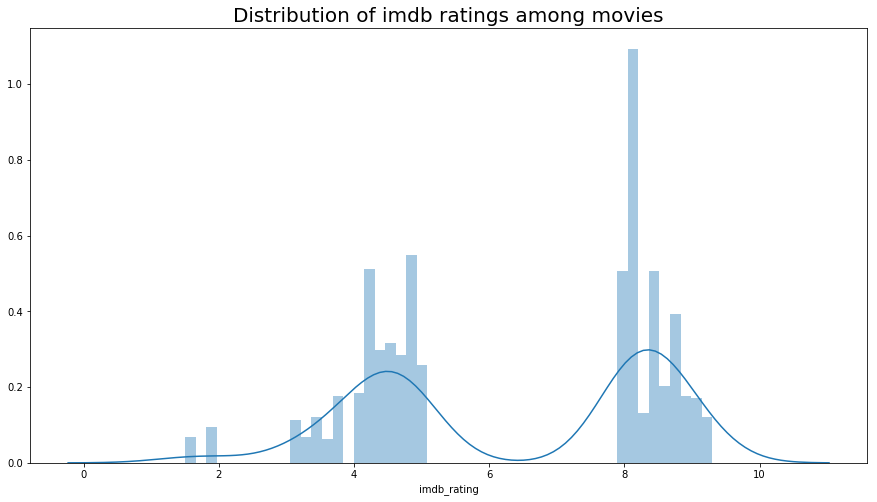

In [126]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.imdb_rating,bins = 50);
plt.title("Distribution of imdb ratings among movies", size = 20);

The distribution of the imdb_rating clearly shows how I have chosen two sets of movies. This could give me a result with better r scores. However, it is important to keep in mind that in the real work the distribution do not act similarly. Often you get data sets 


/Users/masumrumi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


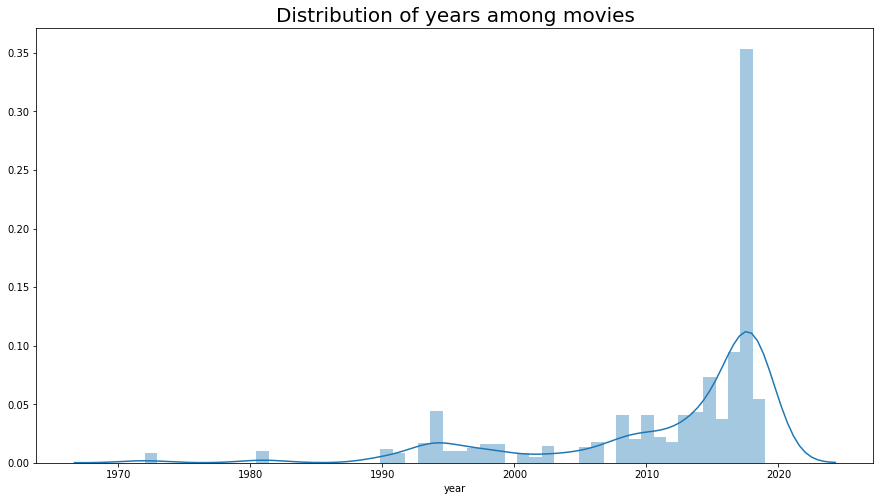

In [127]:
fig, ax = plt.subplots(figsize = (15,8))
sns.distplot(df.year,bins = 50);
plt.title("Distribution of years among movies", size = 20);

Most of the movies are pretty recent.

In [128]:
df

,title_id,title,runtime,certificate,imdb_rating,year,votes,user_review,critic_review,language,country,budget,gross_1,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores,Biography,Drama,Music,Romance,Comedy,Animation,Action,Adventure,Fantasy,War,Crime,Sci-Fi,Mystery,Documentary,History,Family,Thriller,Horror,Western
0,tt1727824,Bohemian Rhapsody,134,PG-13,8.2,2018,220348,2392,378,English,UK,52000000,0,NaN,NaN,0,0,62.0,1.0,89,17860,4.4,213,133,67.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt6155172,Roma,135,R,8.0,2018,64331,624,311,Spanish,Mexico,0,0,NaN,NaN,0,0,96.0,9.0,76,3435,3.9,315,14,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tt1517451,A Star Is Born,136,R,8.0,2018,161418,1893,395,English,USA,36000000,0,NaN,NaN,0,0,90.0,1.0,80,15993,4.1,403,45,84.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt6966692,Green Book,130,PG-13,8.3,2018,41587,418,250,English,USA,23000000,0,NaN,NaN,0,0,81.0,4.0,95,3723,4.4,215,52,76.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tt4633694,Spider-Man: Into the Spider-Verse,117,PG,8.7,2018,89749,892,323,English,USA,90000000,0,NaN,NaN,0,0,0.0,0.0,0,0,0,0,0,NaN,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,tt7961060,Dragon Ball Super: Broly,100,PG,8.4,2018,9263,202,39,Japanese,Japan,8500000,0,NaN,NaN,0,0,81.0,7.0,94,2267,4.6,40,9,77.0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
6,tt4154756,Avengers: Infinity War,149,PG-13,8.5,2018,578010,3723,556,English,USA,321000000,0,NaN,NaN,0,0,85.0,6.0,91,51037,4.5,349,63,93.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
7,tt2386490,How to Train Your Dragon: The Hidden World,104,PG,8.1,2019,5475,110,61,English,USA,129000000,0,NaN,NaN,0,0,98.0,2.0,0,47367,0,50,1,NaN,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
8,tt8291224,Uri: The Surgical Strike,138,Unrated,9.1,2019,15818,633,12,Hindi,India,450000000,0,NaN,NaN,0,0,70.0,9.0,95,322,4.7,7,3,69.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
9,tt0468569,The Dark Knight,152,PG-13,9.0,2008,2015091,5713,407,English,USA,185000000,0,NaN,NaN,0,0,94.0,6.0,94,1830714,4.4,312,20,87.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


## Feature Engineering
<a name ="feature_engineering"></a>

In [129]:
df = pd.get_dummies(df, columns=["language", "country"], drop_first=True)

In [130]:
df = pd.get_dummies(df, columns=["certificate"],dummy_na=True, drop_first=True)

In [131]:
df['label'] = df.imdb_rating.apply(lambda x : 1 if x > 7.5 else 0)

In [132]:
y = df.label
X = df.drop(["title_id", "title", "imdb_rating", "label" ],axis = 1)


### Train-test split
<a name="train_test_split"></a>

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25)

#### Imputing for NaN values

In [134]:
from fancyimpute import KNN

/Users/masumrumi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [135]:
header = X_train.columns

In [136]:
X_train= KNN(k=5).complete(X_train)

In [137]:
X_train = pd.DataFrame(X_train, columns=header)

In [138]:
X_train.head()

,runtime,year,votes,user_review,critic_review,budget,gross_1,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores,Biography,Drama,Music,Romance,Comedy,Animation,Action,Adventure,Fantasy,War,Crime,Sci-Fi,Mystery,Documentary,History,Family,Thriller,Horror,Western,language_Chinese,language_English,language_French,language_Hindi,language_Japanese,language_Spanish,language_Turkish,country_Canada,country_China,country_France,country_Germany,country_India,country_Japan,country_Lebanon,country_Mexico,country_Netherlands,country_New Zealand,country_Puerto Rico,country_Spain,country_Turkey,country_UK,country_USA,certificate_NC-17,certificate_PG,certificate_PG-13,certificate_R,certificate_TV-14,certificate_TV-MA,certificate_Unrated,certificate_nan
0,93.0,2018.0,16036.0,474.0,119.0,10000000.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,20.0,2124.0,1.7,5.0,66.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,153.0,2013.0,512682.0,732.0,480.0,46000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,113.0,4.1,0.0,0.0,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,101.0,2017.0,64437.0,919.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,102.0,2018.0,1063.0,25.0,12.0,15000000.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,50.0,45.0,2.9,0.0,16.0,90.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,115.0,1996.0,39384.0,133.0,52.0,40000000.0,0.0,0.0,0.0,0.0,0.0,12.0,6.0,24.0,53974.0,2.4,8.0,61.0,34.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
X_test = KNN(k=5).complete(X_test)

In [140]:
X_test = pd.DataFrame(X_test, columns=header)

In [141]:
X_test.head()

,runtime,year,votes,user_review,critic_review,budget,gross_1,oscar_win,oscar_nom,other_win,other_nom,rt_score,rt_avg_rating,rt_audience_score,rt_user_rating,rt_avg_aud_rating,rt_fresh,rt_rotten,metascores,Biography,Drama,Music,Romance,Comedy,Animation,Action,Adventure,Fantasy,War,Crime,Sci-Fi,Mystery,Documentary,History,Family,Thriller,Horror,Western,language_Chinese,language_English,language_French,language_Hindi,language_Japanese,language_Spanish,language_Turkish,country_Canada,country_China,country_France,country_Germany,country_India,country_Japan,country_Lebanon,country_Mexico,country_Netherlands,country_New Zealand,country_Puerto Rico,country_Spain,country_Turkey,country_UK,country_USA,certificate_NC-17,certificate_PG,certificate_PG-13,certificate_R,certificate_TV-14,certificate_TV-MA,certificate_Unrated,certificate_nan
0,142.0,1994.0,1566163.0,1808.0,155.0,55000000.0,0.0,0.0,0.0,0.0,0.0,72.0,2.0,95.0,1243857.0,4.1,66.0,26.0,38.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,118.0,2017.0,78519.0,279.0,239.0,55000000.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,48.0,27376.0,3.0,21.0,165.0,77.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,100.0,2015.0,137525.0,769.0,409.0,120000000.0,0.0,0.0,0.0,0.0,0.0,27.0,5.0,45.0,759048.0,3.1,57.0,153.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,86.0,2018.0,4143.0,153.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,10.0,136.0,1.5,1.0,20.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,175.0,1972.0,1404559.0,2942.0,233.0,6000000.0,0.0,0.0,0.0,0.0,0.0,98.0,3.0,98.0,732022.0,4.4,86.0,2.0,65.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [142]:
# imputing the mean for any nulls
"""for i in numeric_columns:
    X_train[i] = [X_train.i.mean() if x == np.nan else x for x in X_train[i]]
    X_test[i] = [X_test.i.mean() if x == np.nan else x for x in X_test[i]]"""

'for i in numeric_columns:\n    X_train[i] = [X_train.i.mean() if x == np.nan else x for x in X_train[i]]\n    X_test[i] = [X_test.i.mean() if x == np.nan else x for x in X_test[i]]'

#### Feature scaling

In [143]:
from sklearn.preprocessing import minmax_scale, StandardScaler

In [144]:
scale = ["runtime", "year", "votes", "user_review", "critic_review", "budget", "gross_1", "rt_score", "rt_avg_rating", "rt_audience_score", "rt_user_rating", "rt_avg_aud_rating", "rt_fresh", "rt_rotten", "metascores"]

In [145]:
scaler = StandardScaler()

In [146]:
X_train[scale] = scaler.fit_transform(X_train[scale])
#X_test[scale] = scaler.fit_transform(X_test[scale])

In [147]:
X_test[scale] = scaler.fit_transform(X_test[scale])

## Creating Models
<a name="creating_models"></a>


In [148]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier

##### Finding the best Max_depth

In [151]:
# finding the best max depth for the DecisionTreeClassifier. 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

for i in [1,2,3,4,5,6,7,None]:
    print ("Max depth:{}".format(i))
    clf = DecisionTreeClassifier(max_depth=i)
    print (cross_val_score(clf, X_train, y_train, cv=cv, n_jobs =1).mean())
  

##### GridSearch on Random Forest

In [152]:
grid = {
    'n_estimators': [10, 20, 30, 50, 100],
    'max_features': [1,2,3,4,5,6,'auto'],
    'criterion': ['gini','entropy'],
    'class_weight': ["balanced","balanced_subsample",None]
}



dtc_ = DecisionTreeClassifier(max_depth=6)
rf = RandomForestClassifier(dtc_)
gs = GridSearchCV(rf, grid)

model_rf_gs = gs.fit(X_train, y_train)
gs.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 1,
 'n_estimators': 10}

In [154]:
print (gs.best_params_)
print (gs.best_score_)

##### Create Random Forest Model using the best param_ from GridSearch

In [155]:
rf = RandomForestClassifier(max_features = gs.best_params_["max_features"],\
                            n_estimators = gs.best_params_["n_estimators"],\
                            criterion = gs.best_params_["criterion"],\
                            class_weight = gs.best_params_["class_weight"])
model_rf = rf.fit(X_train, y_train)

In [156]:
## Predict y_train for X_train
y_pred = model_rf.predict(X_train)

In [157]:
## Predict y_test
y_pred_test = model_rf.predict(X_test)

### Result Metrics
<a name="result_metrics"></a>

In [158]:
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred_test),\
            columns=["Predicted high", "Predicted low"],\
            index=["is high","is low"] )

,Predicted high,Predicted low
is high,127,0
is low,0,127


In [165]:
print (classification_report(y_train, y_pred, labels=model_rf.classes_))

In [163]:
# Print classification report for y_test
print(classification_report(y_test, y_pred_test, labels=model_rf.classes_))

In [164]:
# Printing accuracy Score
print (accuracy_score(y_train, y_pred))
print (accuracy_score(y_test, y_pred_test))

### Feature Importance
<a name="feature_importance"></a>

In [166]:
# Get features Gini scores
feature_importances = pd.DataFrame(model_rf.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance'])

feature_importances[feature_importances['importance']!=0].sort_values(by='importance', ascending=False).head(10)

,importance
user_review,0.120702
rt_audience_score,0.113006
critic_review,0.090910
runtime,0.077821
rt_score,0.063024
rt_avg_aud_rating,0.058725
votes,0.052371
rt_user_rating,0.050918
rt_fresh,0.032719
rt_rotten,0.032071


### ROC/AUC CURVE
<a name="roc_auc_curve"></a>

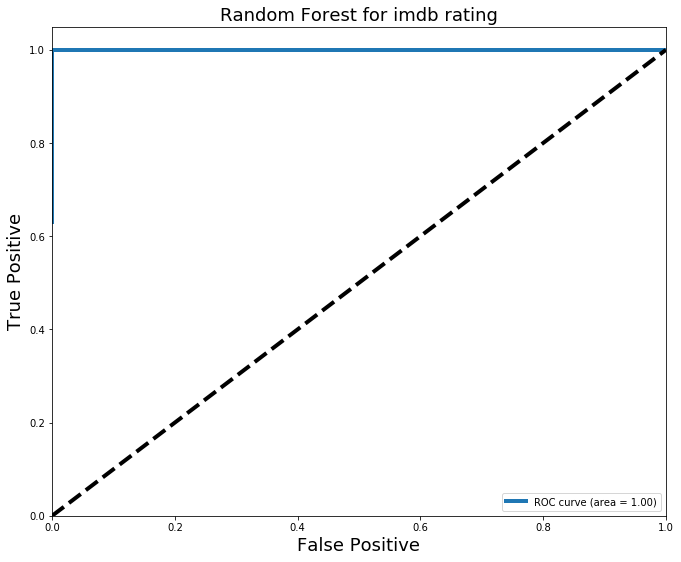

In [167]:
Y_score = model_rf_gs.best_estimator_.predict_proba(X_test)[:,1]


# For class 1, find the area under the curve
FPR, TPR, _ = roc_curve(y_test, Y_score)
ROC_AUC = auc(FPR, TPR)
"""
PREC, REC, _ = precision_recall_curve(y_test, Y_score)
PR_AUC = auc(REC, PREC)"""

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % ROC_AUC, linewidth=4)
#plt.plot(REC, PREC, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive', fontsize=18)
plt.ylabel('True Positive', fontsize=18)
plt.title('Random Forest for imdb rating', fontsize=18)
plt.legend(loc="lower right")
plt.show()

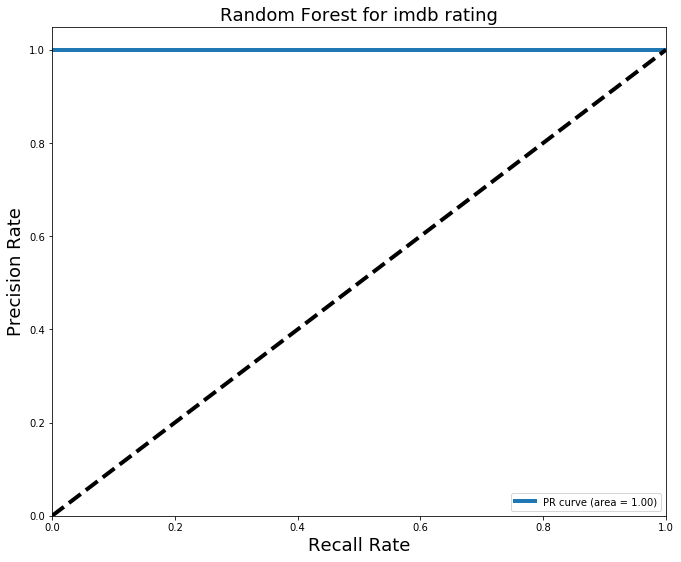

In [168]:
Y_score = model_rf_gs.best_estimator_.predict_proba(X_test)[:,1]


# For class 1, find the area under the curve
PREC, REC, _ = precision_recall_curve(y_test, Y_score)
PR_AUC = auc(REC, PREC)

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(REC, PREC, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall Rate', fontsize=18)
plt.ylabel('Precision Rate', fontsize=18)
plt.title('Random Forest for imdb rating', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Wrapping Up
<a name="wrapping_up"></a>

My model seems to perform too well. One of the reasons could be the way I collected data. I hypothesis is that I was biased while collecting data. The way I web-scraped and collected my data points, there was a huge difference between the two types of data which is unlikely in the real world data problems. This is something to think about for the upcoming projects. 

### Next..
<a name="next"></a>

I believe one of the reasons why my model was giving me really good results is because of the way I collected data from the beginning. While web scraping I basically collected two type of movies. First with imdb_rating over 8 and then imdb_rating below 5. Since there is a big gap in the rating, My model was able to predict too well. This is unlikely in the real world. Therefore, my next procedure would be to web scrape again but this time I should have more variety in the rating while scraping since it is my target variable. Also I would like to work with Actors, Director and Writers as a part of NLP for the next trial. 